In [2]:
!ls
# Numerical Imporst 
import pandas as pd
import numpy as np
import scipy 

# Plotting 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

# Python 
import os

# sklearn 
from sklearn.metrics import f1_score # f1_score(y_true, y_pred)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel

# scipy
from scipy.cluster import hierarchy as hc # for dendograms 

final_after_na.ipynb  NA with RNA-Seq.ipynb  sum_tab_1.csv  train_pro.tsv
Full.ipynb	      Proteomics.ipynb	     sum_tab_2.csv  train_rna.tsv
Gender Visual.ipynb   README.txt	     test_cli.tsv   visuals.ipynb
Import.ipynb	      RNA-Seq Final.ipynb    test_pro.tsv
MSI Visual.ipynb      RNA-Seq.ipynb	     test_rna.tsv
NA.ipynb	      start.ipynb	     train_cli.tsv


In [3]:
df_train_pro = pd.read_table(f'{os.getcwd()}/train_pro.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_test_pro = pd.read_table(f'{os.getcwd()}/test_pro.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_train_rna = pd.read_table(f'{os.getcwd()}/train_rna.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_test_rna = pd.read_table(f'{os.getcwd()}/test_rna.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_train_cli = pd.read_csv(f'{os.getcwd()}/train_cli.tsv', 
                           delim_whitespace=True,
                           low_memory=False,)
df_test_cli = pd.read_csv(f'{os.getcwd()}/test_cli.tsv', 
                           delim_whitespace=True,
                           low_memory=False,)
df_train_mislabel = pd.read_csv(f'{os.getcwd()}/sum_tab_1.csv', 
                           low_memory=False,)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [4]:
# df_train_pro
# df_test_pro
# df_train_rna
# df_test_rna
# df_train_cli
# df_test_cli
# df_train_mislabel

In [5]:
# Come back to the way you handle this NA, sophisticated way will imporve by at least 5% 
train_pro = df_train_pro.copy(deep=True)
train_pro = train_pro.fillna(train_pro.median())
train_pro.index.name = 'sample'

test_pro = df_test_pro.copy(deep=True)
test_pro = test_pro.fillna(test_pro.median())
test_pro.index.name = 'sample'


train_rna = df_train_rna.copy(deep=True)
train_rna = train_rna.fillna(train_rna.median())
train_rna.index.name = 'sample'

test_rna = df_test_rna.copy(deep=True)
test_rna = test_rna.fillna(test_rna.median())
test_rna.index.name = 'sample'

In [6]:
# df_train_pro
# train_pro
# df_test_pro
# test_pro

In [7]:
# df_train_rna
# train_rna
# df_test_rna
# test_rna

In [8]:
train_cli = df_train_cli.copy(deep=True)
train_cli = train_cli.set_index('sample')
train_cli = train_cli.replace({'gender': {'Male':0, 'Female':1},
                              'msi': {'MSI-Low/MSS':0, 'MSI-High':1}})

test_cli = df_test_cli.copy(deep=True)
test_cli = test_cli.set_index('sample')
test_cli = test_cli.replace({'gender': {'Male':0, 'Female':1},
                              'msi': {'MSI-Low/MSS':0, 'MSI-High':1}})

In [9]:
# df_train_cli
# train_cli
# df_test_cli
# test_cli

In [10]:
train_mislabel = df_train_mislabel.copy(deep=True)
train_mislabel = train_mislabel.set_index('sample')

In [11]:
# df_train_mislabel
# train_mislabel

In [12]:
train_pro.reset_index(drop=True, inplace=True)
train_rna.reset_index(drop=True, inplace=True)
train_cli.reset_index(drop=True, inplace=True)
train_mislabel.reset_index(drop=True, inplace=True)

In [13]:
# train_pro
# train_rna
# train_cli
# train_mislabel

In [14]:
train_pro_combined = pd.concat([train_mislabel, train_cli, train_pro], axis=1)
train_rna_combined = pd.concat([train_mislabel, train_cli, train_rna], axis=1)
train_combined = pd.concat([train_mislabel, train_cli, train_rna, train_pro], axis=1)

In [15]:
# train_pro_combined
# train_rna_combined
train_combined

,mismatch,gender,msi,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A4GALT,AAAS,AACS,AADAC,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AANAT,AAR2,AARD,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,AATK,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,ABCA8,ABCA9,ABCB1,ABCB10,ABCB11,ABCB4,ABCB5,ABCB6,...,XRCC4,XRCC5,XRCC6,XRN1,XRN2,YARS,YARS2,YBX1,YBX3,YIPF4,YIPF5,YIPF6,YKT6,YLPM1,YME1L1,YTHDF2,YTHDF3,YWHAB,YWHAE,YWHAG,YWHAH,YWHAQ,YWHAZ,ZADH2,ZAK,ZBED1,ZBTB7A,ZC3H11A,ZC3H13,ZC3H14,ZC3H15,ZC3H4,ZC3HAV1,ZC3HAV1L,ZCCHC8,ZFPL1,ZFR,ZG16,ZMPSTE24,ZMYM3,ZNF185,ZNF207,ZNF280C,ZNF326,ZNF638,ZNF706,ZPR1,ZW10,ZYX,ZZEF1
0,0,1,0,0.810976,0.294094,2.898144,6.548415,1.004192,2.519397,5.749835,5.043260,0.297011,4.504254,2.024335,5.403343,1.831152,5.165514,7.240806,0.177815,5.403007,0.409724,6.551073,3.100041,5.277979,3.298451,5.045930,1.001300,5.689962,0.969101,2.982777,2.366695,0.245197,3.066077,1.492358,0.053929,0.031171,3.255512,0.519140,0.096053,2.246003,0.349446,1.483484,1.022936,0.511371,3.912004,3.714960,0.155912,0.653988,0.175236,3.802488,...,0.969840,5.853167,5.692673,1.532790,3.632066,4.390283,2.785913,2.733676,2.341250,1.007287,1.006993,1.144088,2.698599,1.473819,1.917234,1.455458,1.493388,4.193716,5.192265,3.821649,4.017592,4.665611,6.300753,1.915149,1.620717,1.660843,1.030688,0.992511,1.652999,1.368638,1.630672,1.051260,2.915539,1.624048,1.040985,2.097838,2.657478,5.774241,2.280993,1.163372,1.165423,2.078553,1.530701,1.505944,1.007971,1.005565,1.016313,1.859706,3.834986,1.722888
1,1,1,0,0.340575,0.286721,2.223730,7.355751,0.967359,2.042327,5.949647,5.540432,0.633366,3.143702,2.852460,5.214069,1.350142,4.827544,7.442804,0.077730,4.881468,0.157388,6.859313,3.773362,4.681637,2.354399,3.245056,2.188932,6.038234,0.801714,1.874068,2.420736,0.830577,2.926069,0.687222,0.172355,0.105417,3.612654,1.402553,0.166862,2.521407,0.832623,2.273459,1.123911,0.736438,1.451913,3.560877,0.057962,0.930209,0.608913,4.382873,...,1.044018,5.759085,6.105171,0.993673,3.202251,2.857531,2.834447,3.542736,2.390906,1.007287,1.010723,1.144088,2.132064,2.413960,2.751047,1.632909,1.529682,5.019476,5.062740,3.819669,3.993814,4.389870,6.139485,1.945070,1.662572,1.660843,1.034917,0.995823,1.680459,1.368638,3.392088,2.212228,2.967906,1.312801,1.927286,0.970673,1.792636,3.260775,1.879562,1.163372,1.165423,2.560404,1.530701,2.515630,1.516790,1.009703,1.101494,1.465056,4.156957,1.722888
2,0,0,0,1.612506,0.347598,2.206560,7.045954,2.028455,2.829612,5.230059,4.257250,0.614350,3.063500,3.015768,5.307434,2.007040,5.816310,6.877159,0.110958,5.428458,0.526734,6.060380,3.069175,4.679611,2.549950,4.862690,2.131480,5.540457,2.389167,3.140561,2.544298,0.459123,2.113906,0.217318,0.454064,0.089015,3.405832,1.049774,0.094002,2.719581,0.838956,3.027581,0.836651,0.537880,3.916830,3.583882,0.174002,0.732249,0.567775,3.133188,...,0.974529,5.658831,5.743094,1.532790,2.816889,3.849770,1.258000,2.404759,1.602509,1.006134,1.079447,1.144088,3.002017,0.986676,1.814024,1.632909,1.403137,4.772247,5.047297,3.978143,3.574884,4.230233,5.876627,0.947357,1.072991,1.660843,1.034917,1.315018,1.703609,1.741504,2.703586,1.056045,3.298531,1.312801,1.569004,1.727459,2.115843,4.629868,2.353838,1.163372,1.019584,2.122499,1.530701,1.554500,1.303811,1.009703,1.019879,1.932920,4.303349,1.722888
3,0,1,0,0.768138,0.251778,2.996356,6.451277,1.142773,1.849382,5.526629,4.904821,0.721755,3.025762,2.844898,5.477457,1.477467,6.195029,6.779318,0.081480,5.484737,0.180940,6.266849,2.820478,4.246034,3.250814,4.857285,1.586813,5.563590,1.749705,2.600390,2.150795,0.358562,2.517248,0.493132,0.173244,0.194729,3.170614,1.066757,0.103360,2.310197,0.442474,2.064240,0.579675,0.309876,3.692298,4.082260,0.128512,0.608184,0.325630,2.352980,...,1.044018,5.698497,5.655790,1.532790,2.972644,4.141407,2.314568,2.888977,1.618239,1.007287,1.079447,1.144088,2.869346,0.999796,1.814024,1.011424,1.616613,3.784756,5.332163,2.703492,3.271345,4.095585,5.595029,1.244139,2.636959,1.660843,1.035846,1.521970,2.265474,1.368638,1.753413,1.847031,1

In [16]:
train_msi = train_combined [[ # msi proteomics
                             'TAP1', 'APOL2', 'LCP1', 'PTPN6', 'CASK', 'UBE2L6', 'ICAM1', 'ITGB2',
                             'SDF2L1', 'CKB', 'LAP3', 'IFI30', 'PTPRC', 'HSDL2', 'RFC2', 'WARS',
                             'IFI35', 'TYMP', 'CSRP2', 'TAPBP', 'ERMP1', 'ANP32E', 'HP', 'HK3',
                             'ROCK2', 'ADPGK', 'HSPA4L', 'CNDP2', 'RFTN1', 'GBP1', 'GBP2', 'FMNL1',
                             'NCF2', 'YARS2', 'RPL3', 'SPTLC2', 'ENO1', 'SNX12', 'DMBT1', 'ARL3',
    
                              # mis rna-seq 
                             'EPDR1', 'APOL3', 'POU5F1B', 'CFTR', 'CIITA', 'RAB32', 'MAX',
                             'PRSS23', 'FABP6', 'GABRP', 'LAP3', 'LY6G6D', 'SLC19A3', 'WARS',
                             'DLGAP1-AS5', 'GBP1', 'RAMP1', 'AREG', 'GSPT2', 'TNFAIP2',
                             'EREG', 'TNNC2', 'ANKRD27', 'PLCL2', 'TFCP2L1', 'LAG3', 'GRM8', 
                             'BEX2', 'DEFB1', 'FABP1', 'IRF1', 'CCL4', 'SLC25A48', 'SLC51B', 
                             'TRIM72', 'GBP4', 'HPSE',]]
train_msi

,TAP1,TAP1,APOL2,APOL2,LCP1,LCP1,PTPN6,PTPN6,CASK,CASK,UBE2L6,UBE2L6,ICAM1,ICAM1,ITGB2,ITGB2,SDF2L1,SDF2L1,CKB,CKB,LAP3,LAP3,IFI30,IFI30,PTPRC,PTPRC,HSDL2,HSDL2,RFC2,RFC2,WARS,WARS,IFI35,IFI35,TYMP,TYMP,CSRP2,CSRP2,TAPBP,TAPBP,ERMP1,ERMP1,ANP32E,ANP32E,HP,HP,HK3,HK3,ROCK2,ROCK2,...,SNX12,SNX12,DMBT1,DMBT1,ARL3,ARL3,EPDR1,APOL3,POU5F1B,CFTR,CIITA,RAB32,RAB32,MAX,PRSS23,FABP6,GABRP,LAP3,LAP3,LY6G6D,SLC19A3,WARS,WARS,DLGAP1-AS5,GBP1,GBP1,RAMP1,AREG,GSPT2,GSPT2,TNFAIP2,TNFAIP2,EREG,TNNC2,ANKRD27,PLCL2,TFCP2L1,LAG3,GRM8,BEX2,DEFB1,FABP1,FABP1,IRF1,CCL4,SLC25A48,SLC51B,TRIM72,GBP4,HPSE
0,4.651500,3.101133,4.247370,1.729173,5.632128,5.700658,5.374209,3.369945,4.154355,3.128102,5.769589,1.509587,3.251018,1.846918,4.292112,3.690378,6.153990,1.683073,10.674783,5.380663,6.368250,3.670234,8.026078,1.552930,4.042581,3.531650,5.352057,3.116319,5.415965,1.984686,6.411590,5.450480,4.940763,2.403461,4.663913,4.611946,4.122139,2.680458,4.251167,1.484965,5.392500,3.232196,4.324854,2.647740,0.607501,3.107639,1.803120,3.135466,5.182137,3.398468,...,5.401642,2.697267,4.352768,0.963112,3.267086,1.004921,5.068974,2.920203,3.869936,5.099391,1.186619,6.681547,1.755218,5.620318,7.998968,5.982100,0.646799,6.368250,3.670234,7.976046,4.799500,6.411590,5.450480,0.355432,4.523674,2.060046,3.443459,8.208215,3.336497,1.196881,2.867848,1.135348,5.794335,3.521783,4.554105,2.119821,3.323070,0.575925,2.604495,1.556961,6.038161,10.186393,3.659614,4.705455,3.882035,0.826417,4.218747,0.064427,2.367298,2.258082
1,4.907230,3.201951,3.986794,0.976821,3.796106,5.169007,5.599023,3.571890,4.235484,3.942006,5.461456,1.006684,3.688235,1.880945,3.059149,2.418586,6.182927,1.981326,7.018052,2.075542,5.271563,4.402180,6.059295,1.007091,2.269137,3.128083,5.133011,4.107333,5.199796,2.017740,7.077079,4.765848,5.095093,1.557414,3.431182,3.772282,4.080498,1.826178,5.896692,2.311066,4.493037,2.528123,4.609470,2.473567,0.152414,4.404806,0.926048,2.887179,5.275023,2.623666,...,5.258292,1.892991,2.709942,2.316187,3.878341,2.420171,3.671652,3.661320,0.819895,2.544814,1.385802,4.861392,0.967254,5.321845,4.944090,3.676068,2.165778,5.271563,4.402180,2.024731,0.283180,7.077079,4.765848,0.355432,2.997289,1.150346,5.918686,2.942027,2.287729,1.196881,3.014739,1.709046,0.491910,3.463483,4.372636,3.004773,4.646793,1.117773,0.340012,2.835360,2.925058,4.028863,2.926431,4.698832,2.157183,0.143012,0.505979,2.944485,1.837402,1.514125
2,4.798941,3.124638,3.990949,0.976821,5.032345,5.289991,5.404629,3.596531,4.470647,3.306025,5.657584,1.640503,4.196945,1.909636,4.017248,2.648528,5.729560,2.510110,8.369162,5.297963,5.679534,4.282815,7.921393,1.007091,3.478986,2.341193,5.051220,3.617252,5.464066,0.927270,6.290603,5.062525,4.783647,2.241183,5.428118,4.129270,4.435193,2.349896,5.483897,2.285687,5.048951,3.268108,4.810142,3.259689,2.671395,4.007967,1.346111,1.106836,4.770779,3.098915,...,5.456815,2.262998,3.857408,0.966703,3.225434,1.537651,5.228504,3.220894,3.596637,6.074729,1.829494,6.011091,1.542292,5.904843,6.215481,3.903497,0.445434,5.679534,4.282815,6.757167,2.051195,6.290603,5.062525,0.161357,4.109993,2.912861,4.055472,5.191340,2.657861,1.196881,4.447246,1.709046,4.983040,5.320197,4.509670,2.554536,4.331052,1.099517,4.985691,2.686902,3.402360,11.272918,4.981328,4.528903,3.558163,0.498904,4.752887,0.333649,3.140490,2.106443
3,5.393004,2.834194,3.700651,2.195597,5.312986,5.255789,5.350994,2.898613,5.210874,3.280569,7.034161,1.640511,3.877645,1.927817,4.232269,2.628464,5.903448,1.462462,9.270209,5.772039,6.575479,4.925373,7.410671,1.510015,4.046934,2.535088,5.902457,3.262631,5.407025,0.939209,6.913497,5.111046,5.209759,1.646310,4.882842,4.213196,4.439307,3.967258,4.561391,2.048287,5.091505,3.463893,4.539646,2.234228,0.563115,4.387736,1.310954,1.120556,4.557468,2.152635,...,6.050956,3.235579,1.205263,2.022300,3.814751,2.394171,5.412139,4.105696,2.611039,7.040138,1.553291,6.620644,1.631276,5.624004,5.461973,5.690553,1.513595,6.575479,4.925373,4.167518,2.562546,6.913497,5.111046,0.089273,4.758492,2.821579,3.

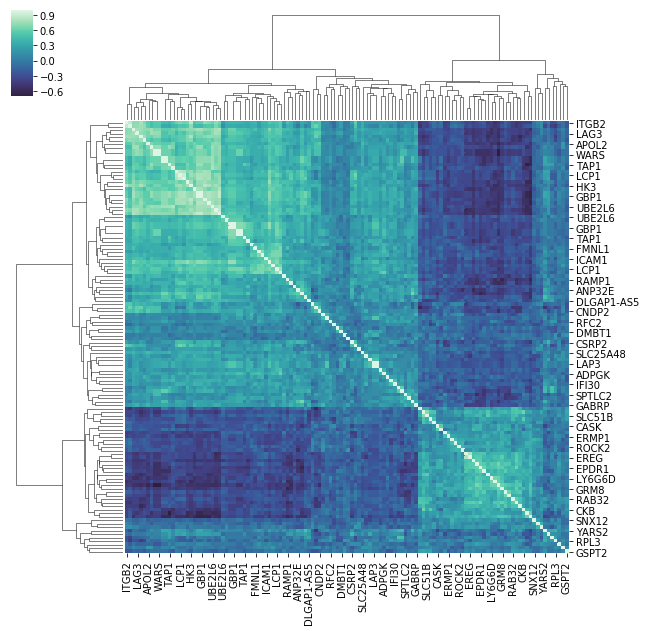

In [17]:
sns.clustermap(train_msi.corr(method='spearman'), center=0, cmap="mako")

In [24]:
train_msi_na = train_combined [[ # msi proteomics with more than 90% availability 
                                'TAP1', 'LCP1', 'PTPN6', 'CASK', 'ICAM1', 'ITGB2',
                                'CKB', 'LAP3', 'PTPRC', 'HSDL2', 'WARS',
                                'IFI35', 'TYMP', 'TAPBP', 'ERMP1', 'ANP32E',
                                'ROCK2', 'CNDP2', 'RFTN1', 'GBP1',
                                'NCF2', 'YARS2', 'RPL3', 'ENO1', 'SNX12', 'ARL3',
                                
                                # mis rna-seq with more than 90% availability 
                                'EPDR1', 'APOL3', 'POU5F1B', 'CFTR', 'CIITA', 'MAX',
                                'PRSS23', 'FABP6', 'GABRP', 'LAP3', 'SLC19A3', 'WARS',
                                'GBP1', 'RAMP1', 'AREG',
                                'EREG', 'TNNC2', 'ANKRD27', 'PLCL2', 'TFCP2L1', 'LAG3', 'GRM8', 
                                'BEX2', 'DEFB1', 'IRF1', 'CCL4', 'SLC51B', 
                                'GBP4', 'HPSE',
                                ]]
columns = train_msi_na.columns

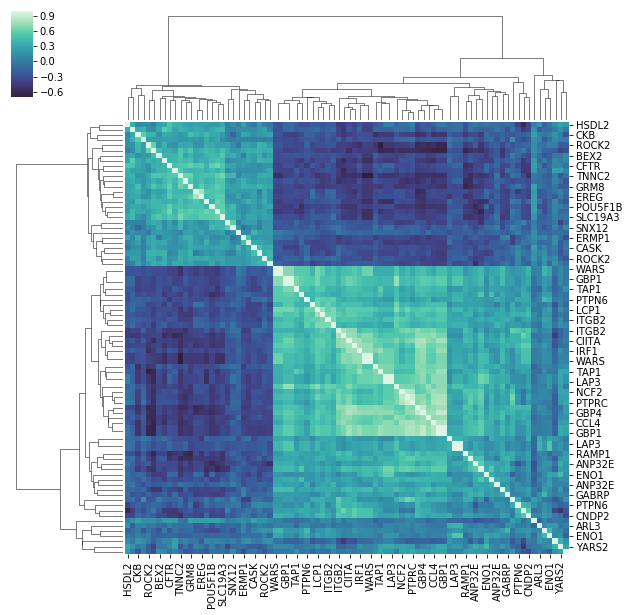

In [19]:
sns.clustermap(train_msi_na.corr(method='spearman'), center=0, cmap="mako")

In [25]:
X_msi_train, X_msi_valid, y_msi_train, y_msi_valid = train_test_split(train_msi_na.values.astype(int),
                                                                      train_combined.msi.values,
                                                                      test_size=0.3)

 1) POU5F1B                        0.270393
 2) CIITA                          0.088352
 3) TAP1                           0.075979
 4) EPDR1                          0.073923
 5) BEX2                           0.046020
 6) IFI35                          0.034018
 7) CCL4                           0.026789
 8) GRM8                           0.021412
 9) GBP4                           0.021039
10) DEFB1                          0.020726
11) CFTR                           0.019932
12) WARS                           0.018494
13) APOL3                          0.018356
14) EREG                           0.016083
15) CNDP2                          0.015227
16) TYMP                           0.013318
17) ICAM1                          0.011773
18) ANKRD27                        0.011258
19) ANP32E                         0.010858
20) WARS                           0.010854
21) HPSE                           0.010327
22) SLC19A3                        0.009521
23) GABRP                       

<BarContainer object of 84 artists>

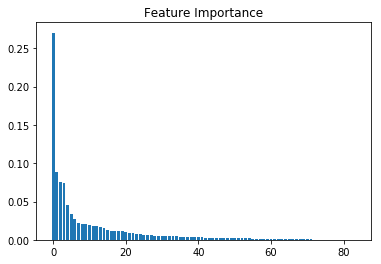

In [26]:
msi_forest = RandomForestClassifier(n_estimators=500, 
                                      min_samples_leaf=3,
                                      max_features=None,
                                      n_jobs=-1,
                                      oob_score=True)

msi_forest.fit(X_msi_train, y_msi_train)

msi_importances = msi_forest.feature_importances_
msi_indices = np.argsort(msi_importances)[::-1]

# for f in range(X_train.shape[1]): # to get the full results
for f in range(len(columns)):
    print("%2d) %-*s %f" % (f + 1, 30, columns[msi_indices[f]], msi_importances[msi_indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_msi_train.shape[1]), msi_importances[msi_indices], align='center')

In [28]:
msi_select = SelectFromModel(msi_forest, threshold=0.00)

msi_select.fit(X_msi_train, y_msi_train)

X_msi_important_train = msi_select.transform(X_msi_train)
X_msi_important_train_df = pd.DataFrame(X_msi_important_train)
X_msi_important_valid = msi_select.transform(X_msi_valid)
msi_forest.fit(X_msi_important_train, y_msi_train)
y_msi_pred = msi_forest.predict(X_msi_important_valid)
print('Random Forest: \n', classification_report(y_true=y_msi_valid, y_pred=y_msi_pred))
print('OOB score: ', msi_forest.oob_score_)

Random Forest: 
              precision    recall  f1-score   support

          0       1.00      0.95      0.98        21
          1       0.75      1.00      0.86         3

avg / total       0.97      0.96      0.96        24

OOB score:  0.8571428571428571
